In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 10)})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Потренируем навыки, полученные на практическом занятии. 
# Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, 
# и попытайтесь обучить линейную модель наиболее качественно.
# Переменная, которую надо предсказать - ’MEDV’.
# Прочитать информацию о содержимом датасета:
# print(load_boston()[‘DESCR’])
# Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.

In [3]:
# Загружаем данные
from sklearn.datasets import load_boston
data = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
data['MEDV'] = pd.DataFrame(load_boston().target)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Получаем описание полученных данных

# CRIM: Уровень преступности на душу населения по городам
# ZN: Доля земель под жилую застройку, зонированных под участки площадью более 25 000 кв. футов
# INDUS: доля акров, не связанных с розничной торговлей, на город
# CHAS: фиктивная переменная реки Чарльз (= 1, если участок ограничивает реку; 0 в противном случае)
# NOX: концентрация оксида азота (частей на 10 миллионов)
# RM: Среднее количество комнат в доме
# AGE: Доля жилых домов, построенных до 1940 года.
# DIS: взвешенные расстояния до пяти бостонских центров занятости
# RAD: Индекс доступности радиальных магистралей
# TAX: Полная ставка налога на имущество за 10 000 долларов США.
# PTRATIO: Соотношение учеников и учителей по городам
# B: 1000 (Bk - 0,63) ², где Bk - доля [лиц афроамериканского происхождения] по городам.
# LSTAT: процент населения с более низким статусом
# MEDV: Средняя стоимость домов, занимаемых владельцами, оценивается в 1000 долларов.

In [5]:
# Проверяем наличие пустых значений в датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# Пустых значений нет, это замечательно

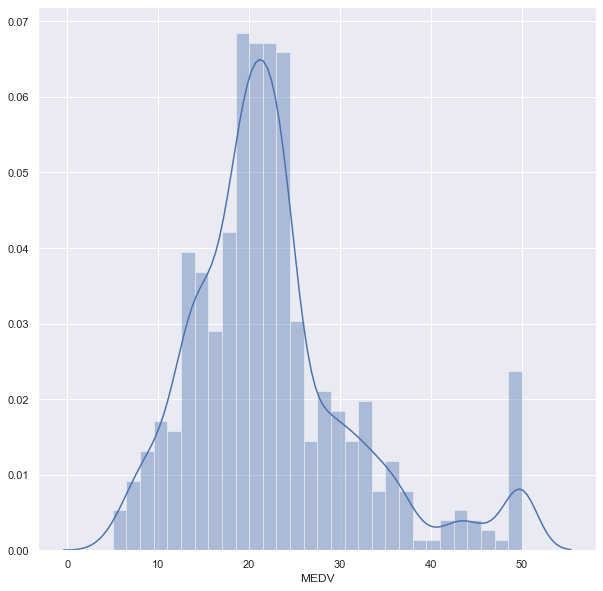

In [7]:
# Смотрим распределение целевых значений
sns.distplot(data['MEDV'], bins=30)

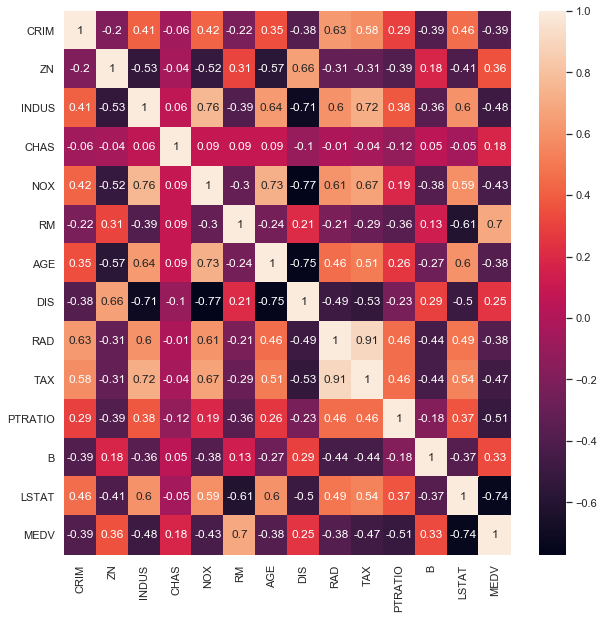

In [8]:
# Строим матрицу корреляции, чтобы определить наиболее значимые признаки, а также признаки, которые закоррелированы
# между собой
sns.heatmap(data=data.corr().round(2), annot=True)

In [9]:
# Наиболее значимые характеристками являются:
X_params = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']

In [10]:
# Из выбранных параметров мультикорелированностью отличаются следующие параметры:
# ['INDUS', 'NOX']
# ['INDUS', 'TAX']
# ['INDUS', 'LSTAT']
# ['RM', 'LSTAT']

In [11]:
# С учетом мультрикоррелиарности пробуем оставить только 2 параметра:
X_params = ['PTRATIO', 'LSTAT']

In [12]:
# Переходим к обучение линейной регрессии

In [13]:
X = data[X_params]
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
model = LinearRegression().fit(X_train, y_train)
error_train = mean_absolute_error(model.predict(X_train), y_train)
error_test = mean_absolute_error(model.predict(X_test), y_test)
print(f'Абсолютная ошибка для выборок: {error_train}, {error_test}')
print(f'Оценка точности для выборок: {model.score(X_train, y_train)}, {model.score(X_test, y_test)}')

Абсолютная ошибка для выборок: 3.8087900136368833, 4.715032708229233
Оценка точности для выборок: 0.6407989265697563, 0.5363275126736049


In [14]:
# Качество модели получилось не очень, сильно снижается на тренировчной выборке
# Пробуем подобрать параметры линейной регрессии
pipe = Pipeline(steps=[('std_slc', StandardScaler()), 
                       ('pca', PCA()),
                       ('reg', LinearRegression())])

parameters = dict(pca__n_components=list(range(1, X_train.shape[1]+1, 1)), 
                  reg__fit_intercept=[True, False], 
                  reg__normalize=[True, False],
                  reg__n_jobs=list(range(1, 11, 1)))


gs = GridSearchCV(pipe, parameters)
gs.fit(X_train, y_train)

fit_intercept, normalize, n_jobs = (gs.best_estimator_.get_params()['reg__fit_intercept'], 
                                                 gs.best_estimator_.get_params()['reg__normalize'], 
                                                 gs.best_estimator_.get_params()['reg__n_jobs'])

print(f'Наилучший результат дают параметры fit_intercept, normalize, n_jobs: {fit_intercept}, {normalize}, {n_jobs}')
model = LinearRegression(fit_intercept=fit_intercept, normalize=normalize, n_jobs=n_jobs)
model.fit(X_train, y_train)
error_train = mean_absolute_error(model.predict(X_train), y_train)
error_test = mean_absolute_error(model.predict(X_test), y_test)
print(f'Абсолютная ошибка для выборок: {error_train}, {error_test}')
print(f'Оценка точности для выборок: {model.score(X_train, y_train)}, {model.score(X_test, y_test)}')

Наилучший результат дают параметры fit_intercept, normalize, n_jobs: True, True, 1
Абсолютная ошибка для выборок: 3.8087900136368846, 4.715032708229234
Оценка точности для выборок: 0.6407989265697563, 0.5363275126736049


In [15]:
# Качество модели не улучшилось
# Пробуем вычислить параметры, которые лучше всего влияют на точность модели
def get_better_error_with_different_variables(list_of_x, data, y):
    final_list_of_parameters = []
    better_error = max(y)
    for _ in list_of_x:
        interim_list_of_parameters = []
        interim_list_of_parameters.extend(final_list_of_parameters)
        interim_list_of_parameters.append(_)
        X = data[interim_list_of_parameters]
        reg = LinearRegression(fit_intercept=fit_intercept, normalize=normalize, n_jobs=n_jobs).fit(X, y)
        pred_values = reg.predict(X)
        error = mean_absolute_error(pred_values, y)
        if error < better_error:
            better_error = error
            final_list_of_parameters.append(_)
    print(f'Наименьшая абсолютная ошибка: {better_error},\nКонечный список параметров: {final_list_of_parameters}')
    return final_list_of_parameters

X = data.drop(['MEDV'], axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
final_list_of_parameters = get_better_error_with_different_variables(list(data.drop(['MEDV'], axis=1).columns), X_train, y_train)

X = data[final_list_of_parameters]
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
model = LinearRegression(fit_intercept=fit_intercept, normalize=normalize, n_jobs=n_jobs).fit(X_train, y_train)
error_train = mean_absolute_error(model.predict(X_train), y_train)
error_test = mean_absolute_error(model.predict(X_test), y_test)
print(f'Абсолютная ошибка для выборок: {error_train}, {error_test}')
print(f'Оценка точности для выборок: {model.score(X_train, y_train)}, {model.score(X_test, y_test)}')

Наименьшая абсолютная ошибка: 3.084834183496716,
Конечный список параметров: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Абсолютная ошибка для выборок: 3.084834183496716, 3.557668475650041
Оценка точности для выборок: 0.7611598772034452, 0.6771696999851693


In [16]:
# Точность модели значительно улучшилась, но все еще далека от идеала

In [17]:
# Пробуем еще улучшить нашу модель за счет использования полиноминальных характеристик
# Но при этом немного модифируем алгоритм и ошибку будем считать на тренирочной выборке
X = data[final_list_of_parameters]
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

best_error = max(y)
for degree in range(1, 5, 1):
    for include_bias in [True, False]:
        for order in ['C', 'F']:
            poly = PolynomialFeatures(degree=degree, include_bias=include_bias, order=order)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.fit_transform(X_test)
            reg = LinearRegression(fit_intercept=fit_intercept, normalize=normalize, n_jobs=n_jobs).fit(X_train_poly, y_train)
            y_test_predicted = reg.predict(X_test_poly)
            error = mean_absolute_error(y_test_predicted, y_test)
            if error < best_error:
                best_error = error
                best_degree = degree
                best_include_bias = include_bias
                best_order = order

print(f'Наименьшая ошибка - {best_error}\n\
Степень полиноминальных характеристик - {best_degree}\n\
Смещение - {best_include_bias}\n\
Порядок вывода в массиве - {best_order}')

X = data[final_list_of_parameters]
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
poly = PolynomialFeatures(degree=best_degree, include_bias=best_include_bias, order=best_order)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
model = LinearRegression(fit_intercept=fit_intercept, normalize=normalize, n_jobs=n_jobs).fit(X_train_poly, y_train)
error_train = mean_absolute_error(model.predict(X_train_poly), y_train)
error_test = mean_absolute_error(model.predict(X_test_poly), y_test)
print(f'Абсолютная ошибка для выборок: {error_train}, {error_test}')
print(f'Оценка точности для выборок: {model.score(X_train_poly, y_train)}, {model.score(X_test_poly, y_test)}')

Наименьшая ошибка - 2.8654722015221066
Степень полиноминальных характеристик - 2
Смещение - True
Порядок вывода в массиве - C
Абсолютная ошибка для выборок: 1.6316184706057009, 2.8654722015221066
Оценка точности для выборок: 0.9332471683804471, 0.8093536758919577


In [18]:
# Модель получилась немного переобучена, но в целом, даже на тренировочной выборке, дает наилучший результат